In [1]:
%run Imports_Plot.ipynb
%run QueryLoad_Gaia.ipynb
%run SpiralModel.ipynb
%run get_JacobiResonanceLines.ipynb

galpy ICRS:		(l,b) =		 [284.40325366 284.18137024 283.69737566 ... 328.30527031 328.19364708
 328.0293963 ] [-42.17353469 -42.06969755 -41.41008782 ...  11.45664917  11.49115086
  11.56669137]  [deg]


This is for an  4  armed spiral pattern
   with corotation radius at  16.8  kpc


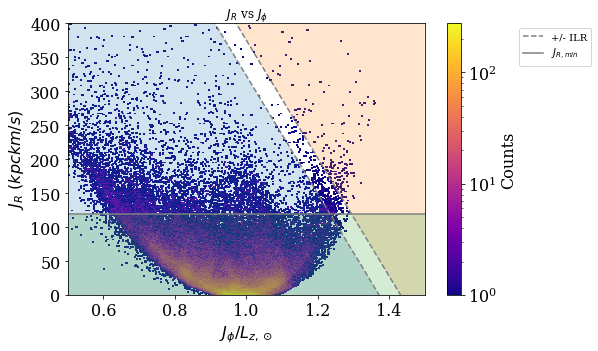

In [24]:
xmin=0.5
xmax=1.5
Lz = np.linspace(xmin,xmax)

ymin=0
ymax=400

wrinklewidth = 0.03
JRmin = 120.

sILR = -getJRfromJacobienergy(Lz, m=Narms, omegas=omegas)[0]
sCR  = -getJRfromJacobienergy(Lz, m=Narms, omegas=omegas)[1]
sOLR = -getJRfromJacobienergy(Lz, m=Narms, omegas=omegas)[2]

iILR = -getJRfromJacobienergy(Lz-wrinklewidth, m=Narms, omegas=omegas)[0]
oILR = -getJRfromJacobienergy(Lz+wrinklewidth, m=Narms, omegas=omegas)[0]


fig = pl.figure(figsize=(8,5))
pl.hist2d(lz, jR*_REFR0*_REFV0, bins=(300,300), norm=LogNorm(), cmap='plasma', range=[[xmin,xmax],[ymin,ymax]])
# pl.plot(Lz,sILR, color='black',ls='-',  label='ILR')
pl.plot(Lz,iILR, color='grey',ls='--', label='+/- ILR')
pl.plot(Lz,oILR, color='gray',ls='--')
pl.axhline(JRmin, color='grey', label='$J_{R,min}$')
pl.fill_between(Lz,ymin,oILR, alpha=0.2)
pl.fill_between(Lz,iILR,ymax, alpha=0.2)
pl.fill_between(Lz,ymin,JRmin, alpha=0.2)

# pl.plot(Lz,sCR,  color='blue' ,ls='-', label='CR')
# pl.plot(Lz,sOLR, color='red'  ,ls='-', label='OLR')
pl.title('$J_{R}$ vs $J_{\phi}$')
pl.xlabel('$J_{\phi}/L_{z,\odot}$')
pl.ylabel(r'$J_{R}$ $(kpc km/s)$')
pl.legend(fontsize=10)
pl.legend(bbox_to_anchor=(1.25,1.),loc='upper left')
cbar = pl.colorbar()
cbar.ax.set_ylabel('Counts')
pl.xlim(xmin,xmax)
pl.ylim(ymin,ymax)
pl.show

print('This is for an ',Narms,' armed spiral pattern')
print('   with corotation radius at ',CRs*ro, ' kpc')